# Probabilistic machine learning
## Deep learning multi-model ensemble

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from scipy.stats import norm

## Usecase: linear RUL

In [11]:
# Define linear function
def func(x, a, c, noise_amp = 0):
    y = a*x + c
    y = y + noise_amp * np.random.randn(len(x))
    return y

# Set parameter limits
x = np.arange(0,10,0.1)
a_range = (0, 2)
c_range = (0, 10)
noise_range = (0,5)

**Sample data observation**

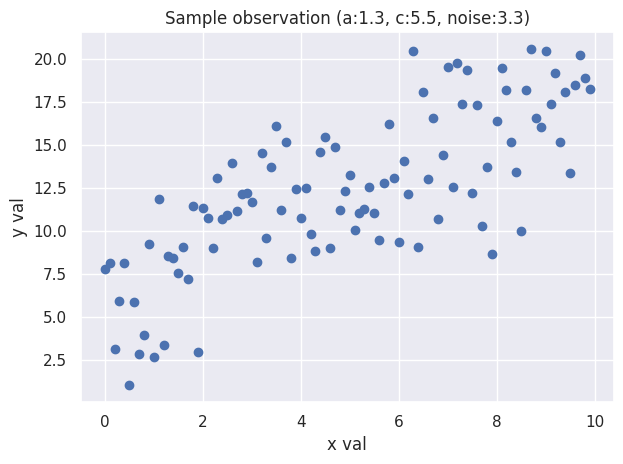

In [12]:
a = 1.3
c = 5.5
noise = 3.3
y = func(x, a, c, noise)
plt.scatter(x,y)
plt.title('Sample observation (a:{}, c:{}, noise:{})'.format(a, c, noise))
plt.xlabel('x val')
plt.ylabel('y val')
plt.tight_layout()
plt.savefig('images/2.1 sample RUL data.png', dpi=150)
plt.show()

In [13]:
# Train the model

n_regessors = 100
n_training_obs = 1000
regressors = []
np.random.seed(2049)

for n in tqdm(range(n_regessors)):

    a_list = np.random.rand(n_training_obs)*(a_range[1] - a_range[0]) + a_range[0]
    c_list = np.random.rand(n_training_obs)*(c_range[1] - c_range[0]) + c_range[0]
    noise_list = np.random.rand(n_training_obs)*(noise_range[1] - noise_range[0]) + noise_range[0]

    targets = np.array(list(zip(a_list,c_list)))
    targets_with_noise = np.array(list(zip(a_list,c_list,noise_list)))
    features = np.array([func(x,a,c,noise) for a, c, noise in targets_with_noise])

    seed = np.random.randint(100000)
    reg = XGBRegressor(random_state=seed)
    reg.fit(features, targets)
    regressors.append(reg)

print('Done')

100%|████████████████████████████████████████████████████████| 100/100 [02:38<00:00,  1.58s/it]

Done


In [14]:
seed = np.random.randint(100000)
a_list = np.random.rand(n_training_obs)*(a_range[1] - a_range[0]) + a_range[0]
c_list = np.random.rand(n_training_obs)*(c_range[1] - c_range[0]) + c_range[0]
noise_list = np.random.rand(n_training_obs)*(noise_range[1] - noise_range[0]) + noise_range[0]

targets = np.array(list(zip(a_list,c_list)))
targets_with_noise = np.array(list(zip(a_list,c_list,noise_list)))
features = np.array([func(x,a,c,noise) for a, c, noise in targets_with_noise])

a_pred = []
c_pred = []

for reg in tqdm(regressors):
    result = reg.predict(features)
    a, c = result.T
    a_pred.append(a)
    c_pred.append(c)

a_pred = np.array(a_pred).T
c_pred = np.array(c_pred).T

a_mean = a_pred.mean(axis=1)
c_mean = c_pred.mean(axis=1)

100%|███████████████████████████████████████████████████████| 100/100 [00:00<00:00, 393.80it/s]


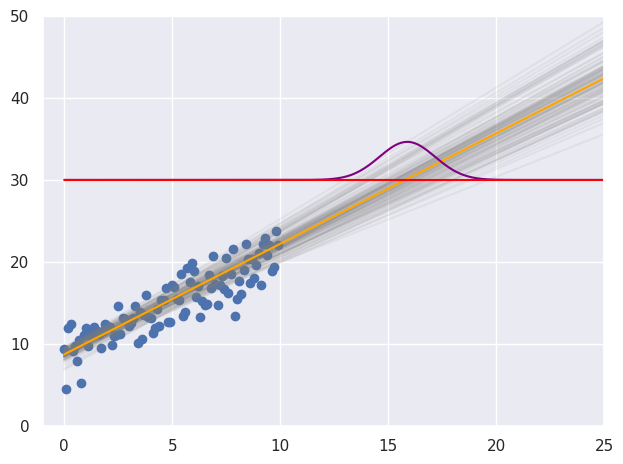

In [18]:
idx = 0

limit = 30
x30 = np.arange(0,30,0.1)
rul_list = []

for idx_reg in range(n_regessors):
    y_pred_idx = func(x30, a_pred[idx][idx_reg], c_pred[idx][idx_reg])
    plt.plot(x30, y_pred_idx, color='grey', alpha=0.1)
    idx_rul = np.abs(y_pred_idx - limit).argmin()
    rul = x30[idx_rul]
    rul_list.append(rul)

y_pred_mean = func(x30, a_mean[idx], c_mean[idx])
plt.plot(x30, y_pred_mean, color='orange')

rul_list = np.array(rul_list)
rul_mean = rul_list.mean()
rul_std = rul_list.std()
rul_pdf = norm.pdf(x30, rul_mean, rul_std)
plt.plot(x30, (rul_pdf*15)+30, color='purple')

plt.hlines(limit, 0, 30, color='red')
plt.scatter(x, features[idx])

plt.xlim(-1,25)
plt.ylim(0,50)
plt.tight_layout()
plt.savefig('images/2.2 inference.png', dpi=150)
plt.show()

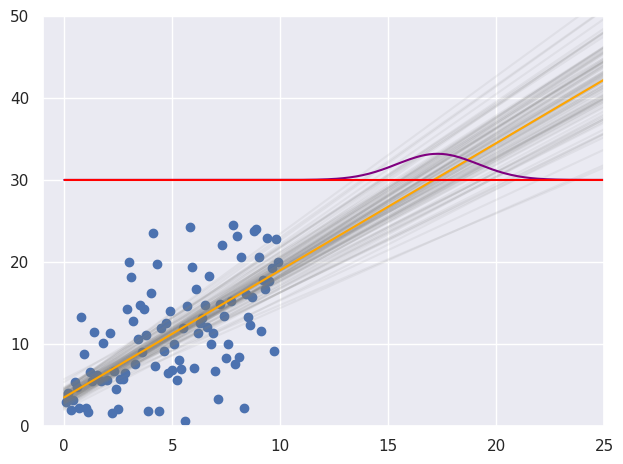

In [22]:
idx = 4

limit = 30
x30 = np.arange(0,30,0.1)
rul_list = []

for idx_reg in range(n_regessors):
    y_pred_idx = func(x30, a_pred[idx][idx_reg], c_pred[idx][idx_reg])
    plt.plot(x30, y_pred_idx, color='grey', alpha=0.1)
    idx_rul = np.abs(y_pred_idx - limit).argmin()
    rul = x30[idx_rul]
    rul_list.append(rul)

y_pred_mean = func(x30, a_mean[idx], c_mean[idx])
plt.plot(x30, y_pred_mean, color='orange')

rul_list = np.array(rul_list)
rul_mean = rul_list.mean()
rul_std = rul_list.std()
rul_pdf = norm.pdf(x30, rul_mean, rul_std)
plt.plot(x30, (rul_pdf*15)+30, color='purple')

plt.hlines(limit, 0, 30, color='red')
plt.scatter(x, features[idx])

plt.xlim(-1,25)
plt.ylim(0,50)
plt.tight_layout()
plt.savefig('images/2.3 inference.png', dpi=150)
plt.show()

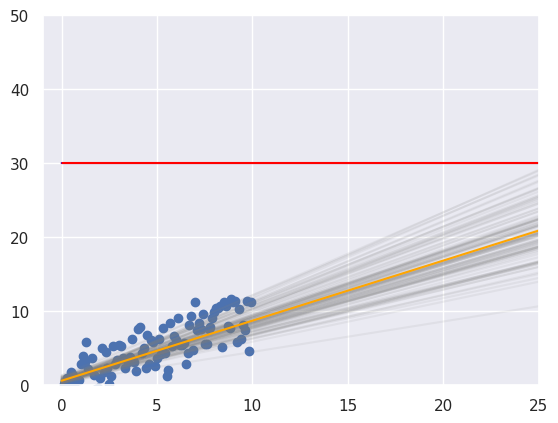

In [23]:
idx = 3

limit = 30
x30 = np.arange(0,30,0.1)
rul_list = []

for idx_reg in range(n_regessors):
    y_pred_idx = func(x30, a_pred[idx][idx_reg], c_pred[idx][idx_reg])
    plt.plot(x30, y_pred_idx, color='grey', alpha=0.1)
    idx_rul = np.abs(y_pred_idx - limit).argmin()
    rul = x30[idx_rul]
    rul_list.append(rul)

y_pred_mean = func(x30, a_mean[idx], c_mean[idx])
plt.plot(x30, y_pred_mean, color='orange')

rul_list = np.array(rul_list)
rul_mean = rul_list.mean()
rul_std = rul_list.std()
rul_pdf = norm.pdf(x30, rul_mean, rul_std)
plt.plot(x30, (rul_pdf*15)+30, color='purple')

plt.hlines(limit, 0, 30, color='red')
plt.scatter(x, features[idx])

plt.xlim(-1,25)
plt.ylim(0,50)
plt.show()

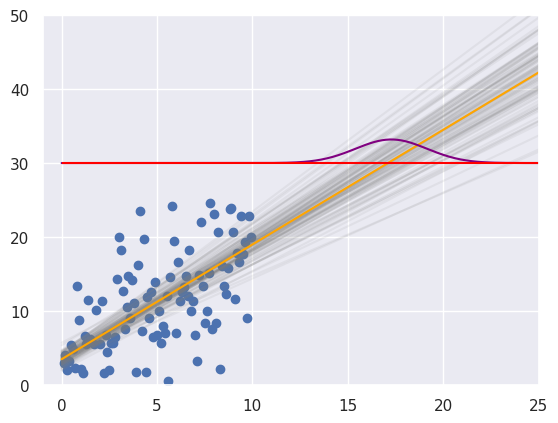

In [24]:
idx = 4

limit = 30
x30 = np.arange(0,30,0.1)
rul_list = []

for idx_reg in range(n_regessors):
    y_pred_idx = func(x30, a_pred[idx][idx_reg], c_pred[idx][idx_reg])
    plt.plot(x30, y_pred_idx, color='grey', alpha=0.1)
    idx_rul = np.abs(y_pred_idx - limit).argmin()
    rul = x30[idx_rul]
    rul_list.append(rul)

y_pred_mean = func(x30, a_mean[idx], c_mean[idx])
plt.plot(x30, y_pred_mean, color='orange')

rul_list = np.array(rul_list)
rul_mean = rul_list.mean()
rul_std = rul_list.std()
rul_pdf = norm.pdf(x30, rul_mean, rul_std)
plt.plot(x30, (rul_pdf*15)+30, color='purple')

plt.hlines(limit, 0, 30, color='red')
plt.scatter(x, features[idx])

plt.xlim(-1,25)
plt.ylim(0,50)
plt.show()

**Correlate std to error**

In [25]:
rul_true_list = []
rul_mean_list = []
rul_std_list = []
x100 = np.arange(0, 100, 0.1)
limit = 30

for idx, a in tqdm(enumerate(a_list)):
    # Find the true RUL
    c = c_list[idx]
    y_true = func(x100, a, c)
    rul_true = x100[np.abs(y_true - limit).argmin()]
    rul_true_list.append(rul_true)

    # Calculate the probabilitic 
    rul_discrete_dist = []
    for idx_reg in range(n_regessors):
        y_pred_idx = func(x100, a_pred[idx][idx_reg], c_pred[idx][idx_reg])
        idx_rul = np.abs(y_pred_idx - limit).argmin()
        rul = x100[idx_rul]
        rul_discrete_dist.append(rul)
    
    rul_mean_list.append(np.mean(rul_discrete_dist))
    rul_std_list.append(np.std(rul_discrete_dist))

1000it [00:04, 233.55it/s]


In [27]:
data = {'noise':noise_list, 'rul_true':rul_true_list, 'rul_pred_mean':rul_mean_list, 'rul_pred_std':rul_std_list}
df = pd.DataFrame(data)
df['rul_pred_error'] = df.rul_pred_mean - df.rul_true
df['rul_pred_error_abs'] = df.rul_pred_error.abs()

# remove ruls that are very far in the future
df = df.loc[df.rul_true <= 80, :]
df.reset_index(drop=True, inplace=True)

df

,noise,rul_true,rul_pred_mean,rul_pred_std,rul_pred_error,rul_pred_error_abs
0,1.875598,18.0,15.878,1.288377,-2.122,2.122
1,2.395235,25.7,23.219,3.056753,-2.481,2.481
2,3.705756,38.7,25.655,3.802088,-13.045,13.045
3,2.151680,34.7,37.449,7.157297,2.749,2.749
4,4.961418,18.6,17.279,1.877088,-1.321,1.321
...,...,...,...,...,...,...
839,3.260499,13.2,13.349,1.002447,0.149,0.149
840,2.467744,12.5,12.397,0.522390,-0.103,0.103
841,0.782789,69.0,59.670,11.231674,-9.330,9.330
842,0.276838,14.8,14.569,0.700670,-0.231,0.231


/tmp/ipykernel_100/2684348881.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  colorbar = plt.colorbar(label='Noise')


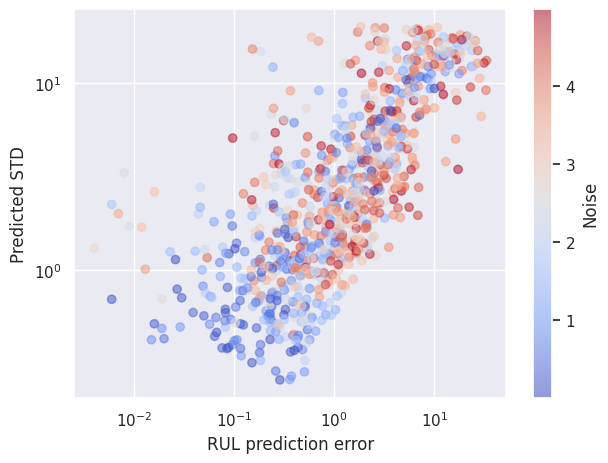

In [28]:
x = df.rul_pred_error_abs
y = df.rul_pred_std
z = df.noise
plt.scatter(x, y, c=z, cmap='coolwarm', alpha=0.5)
colorbar = plt.colorbar(label='Noise')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('RUL prediction error')
plt.ylabel('Predicted STD')
plt.tight_layout()
plt.savefig('images/2.4 STD_error.png', dpi=150)
plt.show()

## Usecase: Linear RUL with dropped data

In [29]:
def drop_data(array, drop_frac_list):
    '''drop_frac: list of [0,1]'''
    for array_idx, x in enumerate(array):
        drop_frac = drop_frac_list[array_idx]
        n_drop = int(len(x) * drop_frac)
        idx_list = np.arange(len(x))
        idx_drop = np.random.choice(idx_list, size = n_drop, replace=False)
        x[idx_drop] = np.nan
        array[array_idx] = x
        
    return array

# Set parameter limits
x = np.arange(0,10,0.1)
a_range = (0, 2)
c_range = (0, 10)
noise_range = (0,5)
drop_range = (0,0.9)

In [30]:
# Train the model

n_regessors = 100
n_training_obs = 1000
regressors = []
np.random.seed(2049)

for n in tqdm(range(n_regessors)):
    seed = np.random.randint(100000)

    a_list = np.random.rand(n_training_obs)*(a_range[1] - a_range[0]) + a_range[0]
    c_list = np.random.rand(n_training_obs)*(c_range[1] - c_range[0]) + c_range[0]
    noise_list = np.random.rand(n_training_obs)*(noise_range[1] - noise_range[0]) + noise_range[0]

    targets = np.array(list(zip(a_list,c_list)))
    targets_with_noise = np.array(list(zip(a_list,c_list,noise_list)))
    features = np.array([func(x,a,c,noise) for a, c, noise in targets_with_noise])
    
    drop_frac_list = np.random.rand(n_training_obs)*(drop_range[1] - drop_range[0]) + drop_range[0]
    features = drop_data(features, drop_frac_list)

    reg = XGBRegressor(random_state=seed)
    reg.fit(features, targets)
    regressors.append(reg)

print('Done')

100%|████████████████████████████████████████████████████████| 100/100 [04:24<00:00,  2.65s/it]

Done


**Test the data**

In [31]:
seed = np.random.randint(100000)
a_list = np.random.rand(n_training_obs)*(a_range[1] - a_range[0]) + a_range[0]
c_list = np.random.rand(n_training_obs)*(c_range[1] - c_range[0]) + c_range[0]
noise_list = np.random.rand(n_training_obs)*(noise_range[1] - noise_range[0]) + noise_range[0]
drop_frac_list = np.random.rand(n_training_obs)*(drop_range[1] - drop_range[0]) + drop_range[0]

targets = np.array(list(zip(a_list,c_list)))
targets_with_noise = np.array(list(zip(a_list,c_list,noise_list)))
features = np.array([func(x,a,c,noise) for a, c, noise in targets_with_noise])
features = drop_data(features, drop_frac_list)

a_pred = []
c_pred = []

for reg in tqdm(regressors):
    result = reg.predict(features)
    a, c = result.T
    a_pred.append(a)
    c_pred.append(c)

a_pred = np.array(a_pred).T
c_pred = np.array(c_pred).T

a_mean = a_pred.mean(axis=1)
c_mean = c_pred.mean(axis=1)

100%|███████████████████████████████████████████████████████| 100/100 [00:00<00:00, 193.65it/s]


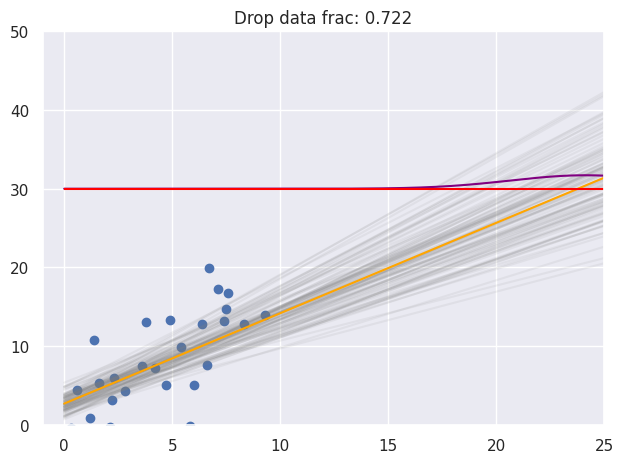

In [37]:
idx = 1

limit = 30
x30 = np.arange(0,30,0.1)
rul_list = []

for idx_reg in range(n_regessors):
    y_pred_idx = func(x30, a_pred[idx][idx_reg], c_pred[idx][idx_reg])
    plt.plot(x30, y_pred_idx, color='grey', alpha=0.1)
    idx_rul = np.abs(y_pred_idx - limit).argmin()
    rul = x30[idx_rul]
    rul_list.append(rul)

y_pred_mean = func(x30, a_mean[idx], c_mean[idx])
plt.plot(x30, y_pred_mean, color='orange')

rul_list = np.array(rul_list)
rul_mean = rul_list.mean()
rul_std = rul_list.std()
rul_pdf = norm.pdf(x30, rul_mean, rul_std)
plt.plot(x30, (rul_pdf*15)+30, color='purple')

plt.hlines(limit, 0, 30, color='red')
plt.scatter(x, features[idx])

plt.title('Drop data frac: {}'.format(round(drop_frac_list[idx],3)))
plt.xlim(-1,25)
plt.ylim(0,50)
plt.tight_layout()
plt.savefig('images/2.5 sample with drop data.png', dpi=150)
plt.show()

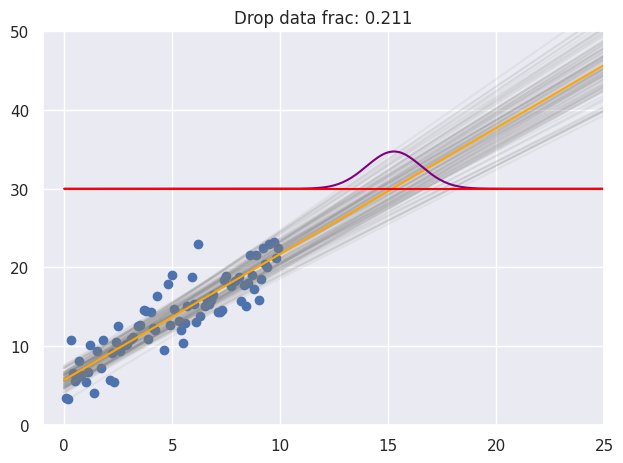

In [38]:
idx = 2

limit = 30
x30 = np.arange(0,30,0.1)
rul_list = []

for idx_reg in range(n_regessors):
    y_pred_idx = func(x30, a_pred[idx][idx_reg], c_pred[idx][idx_reg])
    plt.plot(x30, y_pred_idx, color='grey', alpha=0.1)
    idx_rul = np.abs(y_pred_idx - limit).argmin()
    rul = x30[idx_rul]
    rul_list.append(rul)

y_pred_mean = func(x30, a_mean[idx], c_mean[idx])
plt.plot(x30, y_pred_mean, color='orange')

rul_list = np.array(rul_list)
rul_mean = rul_list.mean()
rul_std = rul_list.std()
rul_pdf = norm.pdf(x30, rul_mean, rul_std)
plt.plot(x30, (rul_pdf*15)+30, color='purple')

plt.hlines(limit, 0, 30, color='red')
plt.scatter(x, features[idx])

plt.title('Drop data frac: {}'.format(round(drop_frac_list[idx],3)))
plt.xlim(-1,25)
plt.ylim(0,50)
plt.tight_layout()
plt.savefig('images/2.6 sample with drop data.png', dpi=150)
plt.show()

In [47]:
rul_true_list = []
rul_mean_list = []
rul_std_list = []
x100 = np.arange(0, 100, 0.1)
limit = 30

for idx, a in tqdm(enumerate(a_list)):
    # Find the true RUL
    c = c_list[idx]
    y_true = func(x100, a, c)
    rul_true = x100[np.abs(y_true - limit).argmin()]
    rul_true_list.append(rul_true)

    # Calculate the probabilitic 
    rul_discrete_dist = []
    for idx_reg in range(n_regessors):
        y_pred_idx = func(x100, a_pred[idx][idx_reg], c_pred[idx][idx_reg])
        idx_rul = np.abs(y_pred_idx - limit).argmin()
        rul = x100[idx_rul]
        rul_discrete_dist.append(rul)
    
    rul_mean_list.append(np.mean(rul_discrete_dist))
    rul_std_list.append(np.std(rul_discrete_dist))

data = {'noise':noise_list, 'drop_frac':drop_frac_list,
        'rul_true':rul_true_list, 'rul_pred_mean':rul_mean_list, 'rul_pred_std':rul_std_list}
df = pd.DataFrame(data)
df['rul_pred_error'] = df.rul_pred_mean - df.rul_true
df['rul_pred_error_abs'] = df.rul_pred_error.abs()

# remove ruls that are very far in the future
df = df.loc[df.rul_true <= 80, :]
#df.reset_index(drop=True, inplace=True)

1000it [00:04, 246.61it/s]


/tmp/ipykernel_100/2661574320.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  colorbar = plt.colorbar(label='Noise')


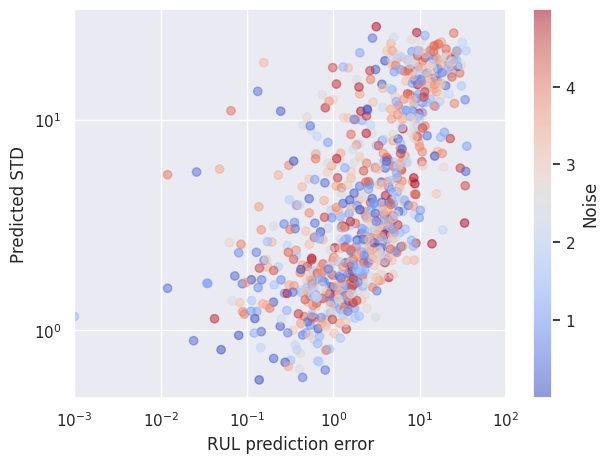

In [48]:
x_plt = df.rul_pred_error_abs
y_plt = df.rul_pred_std
z_plt = df.noise
plt.scatter(x_plt, y_plt, c=z_plt, cmap='coolwarm', alpha=0.5)
colorbar = plt.colorbar(label='Noise')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('RUL prediction error')
plt.ylabel('Predicted STD')
plt.xlim(1e-3,1e2)
plt.tight_layout()
plt.savefig('images/2.7 STD_error with drop data.png', dpi=150)
plt.show()

/tmp/ipykernel_100/3208087933.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  colorbar = plt.colorbar(label='Drop frac')


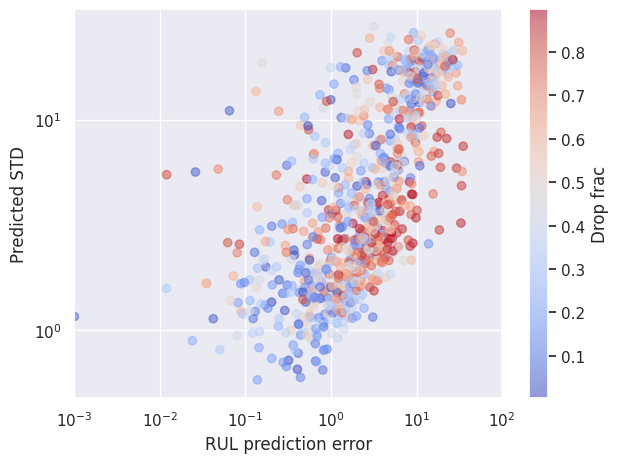

In [49]:
x_plt = df.rul_pred_error_abs
y_plt = df.rul_pred_std
z_plt = df.drop_frac
plt.scatter(x_plt, y_plt, c=z_plt, cmap='coolwarm', alpha=0.5)
colorbar = plt.colorbar(label='Drop frac')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('RUL prediction error')
plt.ylabel('Predicted STD')
plt.xlim(1e-3,1e2)
plt.tight_layout()
plt.savefig('images/2.8 STD_error with drop data2.png', dpi=150)
plt.show()

/tmp/ipykernel_100/1964571367.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  colorbar = plt.colorbar(label='RUL True')


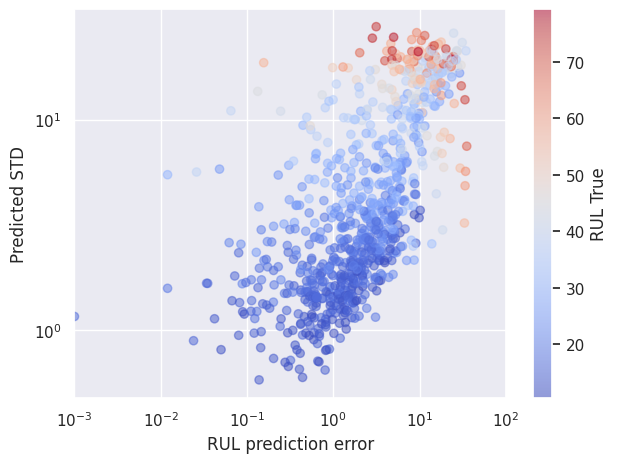

In [50]:
x_plt = df.rul_pred_error_abs
y_plt = df.rul_pred_std
z_plt = df.rul_true
plt.scatter(x_plt, y_plt, c=z_plt, cmap='coolwarm', alpha=0.5)
colorbar = plt.colorbar(label='RUL True')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('RUL prediction error')
plt.ylabel('Predicted STD')
plt.xlim(1e-3,1e2)
plt.tight_layout()
plt.savefig('images/2.9 STD_error with drop data2.png', dpi=150)
plt.show()

**Find instances with far off RULS**

In [51]:
df2 = df.loc[df.rul_true > 70]
df2

,noise,drop_frac,rul_true,rul_pred_mean,rul_pred_std,rul_pred_error,rul_pred_error_abs
111,0.645130,0.731361,74.3,40.779,12.429668,-33.521,33.521
139,0.974943,0.379335,71.0,79.117,21.084867,8.117,8.117
219,3.454811,0.380057,75.9,81.403,19.560805,5.503,5.503
256,0.030006,0.158904,72.4,68.449,19.057468,-3.951,3.951
370,2.083962,0.365466,75.6,70.850,19.350264,-4.750,4.750
419,2.170723,0.766692,79.3,65.423,21.602985,-13.877,13.877
478,0.936969,0.216238,72.2,59.416,19.939487,-12.784,12.784
602,0.453143,0.632169,76.9,79.735,24.424182,2.835,2.835
605,3.870993,0.417621,70.9,46.273,19.933353,-24.627,24.627
631,2.299598,0.377633,77.8,82.798,24.675020,4.998,4.998


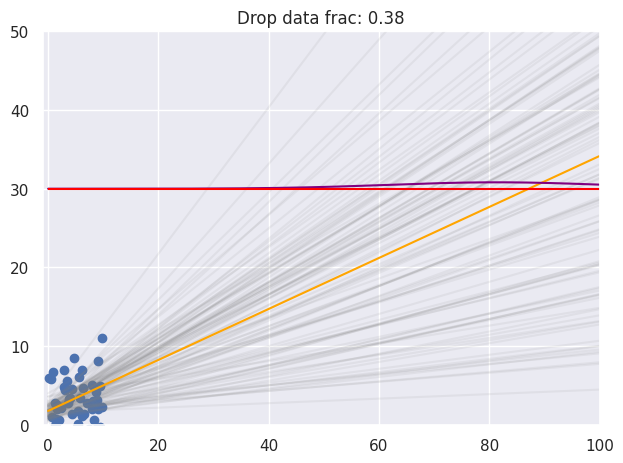

In [58]:
idx = 219

limit = 30
x30 = np.arange(0,100,0.1)
rul_list = []

for idx_reg in range(n_regessors):
    y_pred_idx = func(x30, a_pred[idx][idx_reg], c_pred[idx][idx_reg])
    plt.plot(x30, y_pred_idx, color='grey', alpha=0.1)
    idx_rul = np.abs(y_pred_idx - limit).argmin()
    rul = x30[idx_rul]
    rul_list.append(rul)

y_pred_mean = func(x30, a_mean[idx], c_mean[idx])
plt.plot(x30, y_pred_mean, color='orange')

rul_list = np.array(rul_list)
rul_mean = rul_list.mean()
rul_std = rul_list.std()
rul_pdf = norm.pdf(x30, rul_mean, rul_std)
plt.plot(x30, (rul_pdf*40)+30, color='purple')

plt.hlines(limit, 0, 100, color='red')
plt.scatter(x, features[idx])

plt.title('Drop data frac: {}'.format(round(drop_frac_list[idx],3)))
plt.xlim(-1,100)
plt.ylim(0,50)
plt.tight_layout()
plt.savefig('images/2.10 far rul.png', dpi=150)
plt.show()

## Usecase: Non-linear RUL

In [59]:
def func(x, a, b, c, noise_amp = 0):
    y = a*x**b + c

    if noise_amp == 0:
        y = y
    else:
        y = y + noise_amp * np.random.randn(len(x))
    
    return y

**Parameter ranges**

In [60]:
x = np.arange(0,10,0.1)
a_range = (0, 2)
b_range = (1, 1.5)
c_range = (0, 10)
noise_range = (0,5)

**Test XGBRegressor ability to predict without noise**

In [64]:
# Create training and test data
np.random.seed(2049)
n_observations = 2000
a_list = np.random.rand(n_observations)*(a_range[1] - a_range[0]) + a_range[0]
b_list = np.random.rand(n_observations)*(b_range[1] - b_range[0]) + b_range[0]
c_list = np.random.rand(n_observations)*(c_range[1] - c_range[0]) + c_range[0]

targets = np.array(list(zip(a_list,b_list,c_list)))
features = np.array([func(x,a,b,c) for a, b, c in targets])

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=2049)

In [65]:
reg = XGBRegressor()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

In [66]:
from sklearn.metrics import mean_squared_error
score = mean_squared_error(y_test, y_pred)
print(score)

0.007291536454173103


This shows that the model is working correctly.

**Now let's make many models**, but also add noise

In [67]:
n_regessors = 100
n_training_obs = 1000
regressors = []
np.random.seed(2049)

for n in tqdm(range(n_regessors)):
    seed = np.random.randint(100000)

    a_list = np.random.rand(n_training_obs)*(a_range[1] - a_range[0]) + a_range[0]
    b_list = np.random.rand(n_training_obs)*(b_range[1] - b_range[0]) + b_range[0]
    c_list = np.random.rand(n_training_obs)*(c_range[1] - c_range[0]) + c_range[0]
    noise_list = np.random.rand(n_training_obs)*(noise_range[1] - noise_range[0]) + noise_range[0]

    targets = np.array(list(zip(a_list,b_list,c_list)))
    targets_with_noise = np.array(list(zip(a_list,b_list,c_list,noise_list)))
    features = np.array([func(x,a,b,c,noise) for a, b, c, noise in targets_with_noise])

    reg = XGBRegressor(random_state=seed)
    reg.fit(features, targets)
    regressors.append(reg)

print('Done')

100%|████████████████████████████████████████████████████████| 100/100 [06:21<00:00,  3.82s/it]

Done


**Make a test set and predict**

In [68]:
seed = np.random.randint(100000)
a_list = np.random.rand(n_training_obs)*(a_range[1] - a_range[0]) + a_range[0]
b_list = np.random.rand(n_training_obs)*(b_range[1] - b_range[0]) + b_range[0]
c_list = np.random.rand(n_training_obs)*(c_range[1] - c_range[0]) + c_range[0]
noise_list = np.random.rand(n_training_obs)*(noise_range[1] - noise_range[0]) + noise_range[0]

targets = np.array(list(zip(a_list,b_list,c_list)))
targets_with_noise = np.array(list(zip(a_list,b_list,c_list,noise_list)))
features = np.array([func(x,a,b,c,noise) for a, b, c, noise in targets_with_noise])

a_pred = []
b_pred = []
c_pred = []

for reg in tqdm(regressors):
    result = reg.predict(features)
    a, b, c = result.T
    a_pred.append(a)
    b_pred.append(b)
    c_pred.append(c)

a_pred = np.array(a_pred).T
b_pred = np.array(b_pred).T
c_pred = np.array(c_pred).T

a_mean = a_pred.mean(axis=1)
b_mean = b_pred.mean(axis=1)
c_mean = c_pred.mean(axis=1)

100%|███████████████████████████████████████████████████████| 100/100 [00:00<00:00, 175.11it/s]


In [69]:
noise_list[:10]

array([4.7335037 , 0.47631612, 2.54895259, 1.93938088, 1.83058043,
       4.92195325, 2.28396409, 1.08268882, 1.8473478 , 3.35046762])

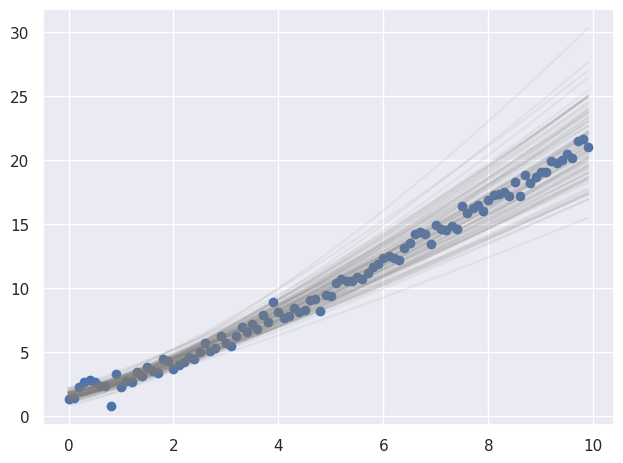

In [77]:
idx = 1

for idx_reg in range(n_regessors):

    plt.plot(x, func(x, a_pred[idx][idx_reg], b_pred[idx][idx_reg], c_pred[idx][idx_reg]), color='grey', alpha=0.1)

plt.scatter(x, features[idx])
plt.tight_layout()
plt.savefig('images/2.11 non-linear rul.png', dpi=150)
plt.show()

(array([105., 100., 100., 100.,  96., 106., 103., 101.,  98.,  91.]),
 array([0.00594525, 0.50407919, 1.00221313, 1.50034707, 1.99848101,
        2.49661495, 2.99474889, 3.49288283, 3.99101677, 4.48915071,
        4.98728465]),
 <BarContainer object of 10 artists>)

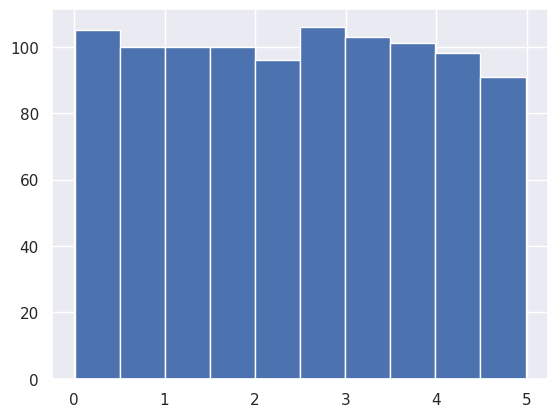

In [15]:
plt.hist(noise_list)

#### Refine the regressor

In [16]:
n_regessors = 100
n_training_obs = 1000
regressors = []
np.random.seed(2049)

for n in tqdm(range(n_regessors)):
    seed = np.random.randint(100000)

    a_list = np.random.rand(n_training_obs)*(a_range[1] - a_range[0]) + a_range[0]
    b_list = np.random.rand(n_training_obs)*(b_range[1] - b_range[0]) + b_range[0]
    c_list = np.random.rand(n_training_obs)*(c_range[1] - c_range[0]) + c_range[0]
    noise_list = np.random.rand(n_training_obs)*(noise_range[1] - noise_range[0]) + noise_range[0]

    targets = np.array(list(zip(a_list,b_list,c_list)))
    targets_with_noise = np.array(list(zip(a_list,b_list,c_list,noise_list)))
    features = np.array([func(x,a,b,c,noise) for a, b, c, noise in targets_with_noise])

    reg = XGBRegressor(n_estimators=30, max_depth=6, random_state=seed)
    reg.fit(features, targets)
    regressors.append(reg)

print('Done')

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [03:08<00:00,  1.89s/it]

Done


In [17]:
a_pred = []
b_pred = []
c_pred = []

for reg in tqdm(regressors):
    result = reg.predict(features)
    a, b, c = result.T
    a_pred.append(a)
    b_pred.append(b)
    c_pred.append(c)

a_pred = np.array(a_pred).T
b_pred = np.array(b_pred).T
c_pred = np.array(c_pred).T

a_mean = a_pred.mean(axis=1)
b_mean = b_pred.mean(axis=1)
c_mean = c_pred.mean(axis=1)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 132.20it/s]


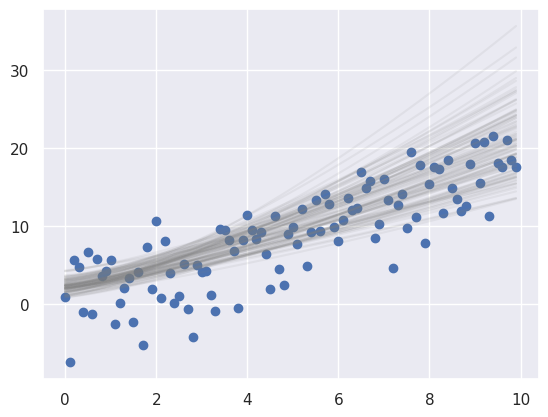

In [18]:
idx = 1

for idx_reg in range(n_regessors):

    plt.plot(x, func(x, a_pred[idx][idx_reg], b_pred[idx][idx_reg], c_pred[idx][idx_reg]), color='grey', alpha=0.1)

plt.scatter(x, features[idx])
plt.show()